<a href="https://colab.research.google.com/github/Livi-Arbo/BME-DS-Notes/blob/main/Data_Science_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lecture 8/30
##Data cleaning by example

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl

when using pandas, only use "as" something as a known acronym, not your own abbreviations. ie: pd for pandas

mri image cloud dataset is being read in.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv")

In [ ]:
df.head(4)


,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0,374,128.3013,51.8593,1,1
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0,300,135.0683,53.6471,1,1
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15,295,193.5488,32.2733,1,1
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10,335,193.7051,32.7869,1,1


In [ ]:
df = df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std'],\
             axis = 1)

if one were to do df['roi'] it would only reference the doi column.

The columns rawid, unnamed, and everything but volume are removed. Then, "intra-cranial volume" (icv) is created.


.loc finds specific elements: here, df is searched for type == 1, and for level == 1. Both the searches are contained in the brackets for df.loc[......]

instead of df.type, df['type'] will ALWAYS find the variable searched for, whereas the . method can overlap with built-in commands

In [ ]:
## Extract the Type 1 Level 1 data
t1l1 = df.loc[(df.type == 1) & (df.level == 1)]
## Create a new column based on ICV
t1l1 = t1l1.assign(icv = sum(t1l1.volume))
t1l1

,roi,volume,type,level,icv
0,Telencephalon_L,531111,1,1,1378295
1,Telencephalon_R,543404,1,1,1378295
2,Diencephalon_L,9683,1,1,1378295
3,Diencephalon_R,9678,1,1,1378295
4,Mesencephalon,10268,1,1,1378295
5,Metencephalon,159402,1,1,1378295
6,Myelencephalon,4973,1,1,1378295
7,CSF,109776,1,1,1378295


calculating the total brain volume

In [ ]:
t1l1 = t1l1.assign(tbv = sum(t1l1.volume[(t1l1.roi != 'CSF')]))
t1l1

,roi,volume,type,level,icv,tbv
0,Telencephalon_L,531111,1,1,1378295,1268519
1,Telencephalon_R,543404,1,1,1378295,1268519
2,Diencephalon_L,9683,1,1,1378295,1268519
3,Diencephalon_R,9678,1,1,1378295,1268519
4,Mesencephalon,10268,1,1,1378295,1268519
5,Metencephalon,159402,1,1,1378295,1268519
6,Myelencephalon,4973,1,1,1378295,1268519
7,CSF,109776,1,1,1378295,1268519


In [ ]:
sum(t1l1['volume'][t1l1['roi'] != 'CSF'])

1268519

comp: the percent as a decimal of the total brain volume

In [ ]:
t1l1 = t1l1.assign(comp = lambda x: x.volume / x.tbv)
t1l1

,roi,volume,type,level,icv,tbv,comp
0,Telencephalon_L,531111,1,1,1378295,1268519,0.418686
1,Telencephalon_R,543404,1,1,1378295,1268519,0.428377
2,Diencephalon_L,9683,1,1,1378295,1268519,0.007633
3,Diencephalon_R,9678,1,1,1378295,1268519,0.007629
4,Mesencephalon,10268,1,1,1378295,1268519,0.008094
5,Metencephalon,159402,1,1,1378295,1268519,0.125660
6,Myelencephalon,4973,1,1,1378295,1268519,0.003920
7,CSF,109776,1,1,1378295,1268519,0.086539


the plot.bar function automatically creates the plot with pandas

<Axes: xlabel='roi'>

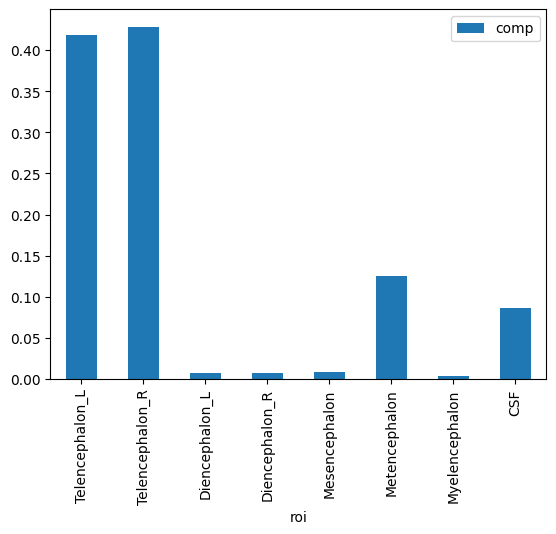

In [ ]:
t1l1.plot.bar(x='roi',y='comp')


In [ ]:
#!pip install plotly==4.0.0

installs an interactive plotting function

In [ ]:
import plotly.express as px
myplot = px.bar(t1l1, x='roi', y='volume')
myplot.show()

myplot object can be stored as an html or a png etc... to be stored or moved

##Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## this sets some style parameters
sns.set()

add in the csv file but drop the unnecessary columns before import

In [ ]:
## Reading it in, keeping only volume
df = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv")
df = df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std'],\
             axis = 1)
df.head(4)

,roi,volume,type,level,id,icv,tbv
0,Telencephalon_L,531111,1,1,127,1378295,1268519
1,Telencephalon_R,543404,1,1,127,1378295,1268519
2,Diencephalon_L,9683,1,1,127,1378295,1268519
3,Diencephalon_R,9678,1,1,127,1378295,1268519


In [ ]:
## Extract the Type 1 Level 1 data
t1l1 = df.loc[(df.type == 1) & (df.level == 1)]

summary line just selects the columns of interest.
groupby is used to get the roi as the column rather than a row-lable for the following command

In [ ]:
## create a composition variable
t1l1 = t1l1.assign(comp = t1l1.volume / t1l1.tbv)
t1l1 = t1l1.loc[t1l1.roi != 'CSF']
## get the mean of the composition variable across
## subjects by ROI
summary = t1l1[['roi', 'comp']].groupby('roi', as_index=False).mean()
print(summary)

               roi      comp
0   Diencephalon_L  0.007563
1   Diencephalon_R  0.007634
2    Mesencephalon  0.008647
3    Metencephalon  0.124883
4   Myelencephalon  0.003785
5  Telencephalon_L  0.420305
6  Telencephalon_R  0.427184


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Diencephalon_L'),
  Text(1, 0, 'Diencephalon_R'),
  Text(2, 0, 'Mesencephalon'),
  Text(3, 0, 'Metencephalon'),
  Text(4, 0, 'Myelencephalon'),
  Text(5, 0, 'Telencephalon_L'),
  Text(6, 0, 'Telencephalon_R')])

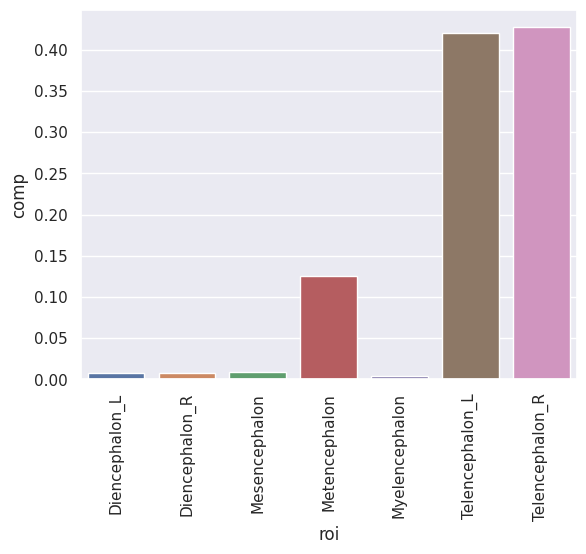

In [ ]:
g = sns.barplot(x='roi', y = 'comp', data = summary)
## this is the matplotlib command for rotating
## axis tick labels by 90 degrees.
plt.xticks(rotation = 90)

In [ ]:
t1l1pivot = t1l1.pivot(index = 'id', columns = 'roi', values = 'volume')
t1l1pivot.head(4)

roi,Diencephalon_L,Diencephalon_R,Mesencephalon,Metencephalon,Myelencephalon,Telencephalon_L,Telencephalon_R
id,,,,,,,
127,9683,9678,10268,159402,4973,531111,543404
142,9156,9071,10516,165803,4912,545603,552216
239,8937,9004,9070,124504,4023,483107,490805
346,8828,8933,9788,135090,4428,558849,568830


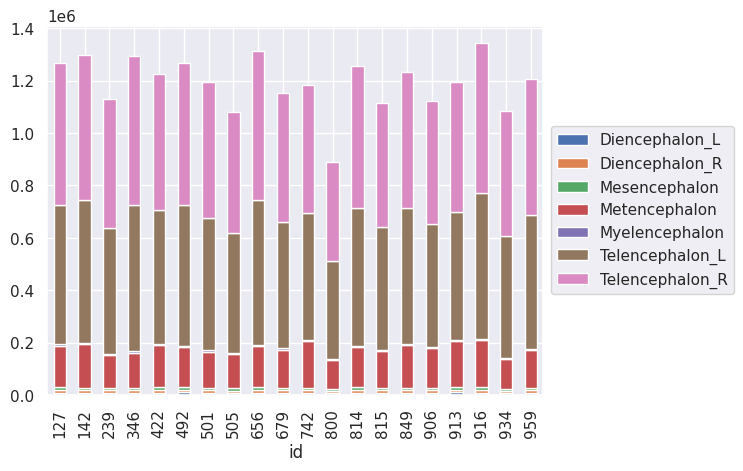

In [ ]:
t1l1pivot.plot(kind='bar', stacked=True, legend= False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#Lecture 2 didn't save ...

#9/11 Lecture
## Intro to Binary Classification, Regressions

### Binary Classification Intro

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## this sets some style parameters
sns.set()
from sklearn.metrics import accuracy_score, roc_curve, auc

In [ ]:
dat = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv")
dat.head(4)

,FLAIR,PD,T1,T2,FLAIR_10,PD_10,T1_10,T2_10,FLAIR_20,PD_20,T1_20,T2_20,GOLD_Lesions
0,1.143692,1.586219,-0.799859,1.634467,0.437568,0.823800,-0.002059,0.573663,0.279832,0.548341,0.219136,0.298662,0
1,1.652552,1.766672,-1.250992,0.921230,0.663037,0.880250,-0.422060,0.542597,0.422182,0.549711,0.061573,0.280972,0
2,1.036099,0.262042,-0.858565,-0.058211,-0.044280,-0.308569,0.014766,-0.256075,-0.136532,-0.350905,0.020673,-0.259914,0
3,1.037692,0.011104,-1.228796,-0.470222,-0.013971,-0.000498,-0.395575,-0.221900,0.000807,-0.003085,-0.193249,-0.139284,0


GOLD_Lesions
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: FLAIR, dtype: object

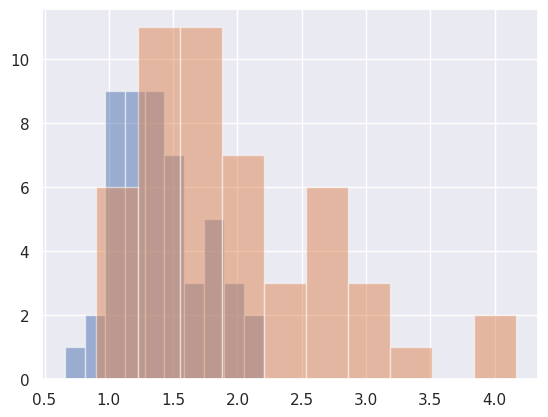

In [ ]:
dat.groupby('GOLD_Lesions').FLAIR.hist(alpha= .5)

<ipython-input-4-4cec1382c996>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x2, shade = True, label = 'Marginal')


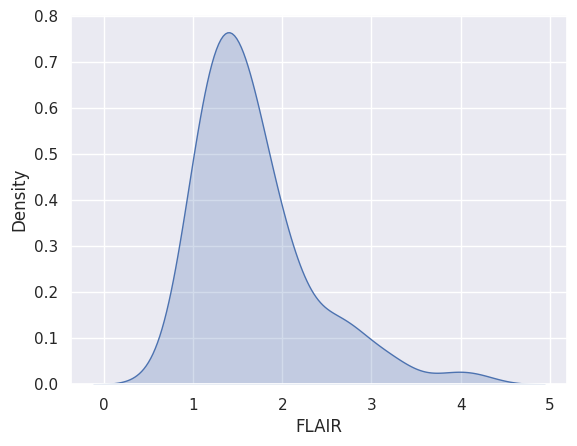

<ipython-input-4-4cec1382c996>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x0, shade = True, label = 'Gold Std = 0')
<ipython-input-4-4cec1382c996>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x1, shade = True, label = 'Gold Std = 1')


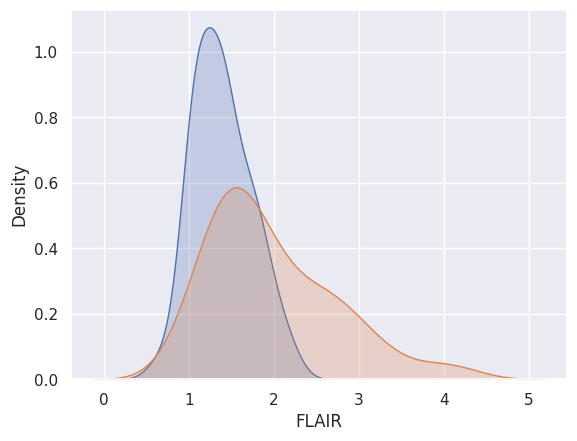

In [ ]:
x0 = dat.FLAIR[dat.GOLD_Lesions == 0]
x1 = dat.FLAIR[dat.GOLD_Lesions == 1]
x2 = dat.FLAIR


sns.kdeplot(x2, shade = True, label = 'Marginal')

plt.show()

sns.kdeplot(x0, shade = True, label = 'Gold Std = 0')
sns.kdeplot(x1, shade = True, label = 'Gold Std = 1')

plt.show()

use a dataset to test the algorithm that isn't used to train the algorithm

In [ ]:
x = dat.FLAIR
y = dat.GOLD_Lesions
n = len(x)
trainFraction = .75

## Build a training and testing set
## Prob of being in the train set is trainFraction
sample = np.random.uniform(size = n) < trainFraction

## Get the training and testing sets
xtrain = x[ sample]
ytrain = y[ sample]
xtest =  x[~sample]
ytest =  y[~sample]

In [ ]:
## Starting values, just set it to
## 0 so that it improves on the first
## try
bestAccuracySoFar = 0

for t in np.sort(xtrain):
  ## Strictly greater than the threshold is
  ## our algorithm
  predictions = (xtrain > t)
  accuracy = np.mean(ytrain == predictions)
  if (accuracy > bestAccuracySoFar):
    bestThresholdSoFar = t
    bestAccuracySoFar = accuracy

threshold = bestThresholdSoFar


**test set accuracy** = proportion of correct classifications on the test data

**test set sensitivity** = proportion declared diseased among those that are actually diseased. (In this case lesion = disease)

**test set specificity** = proportion declared not diseased among those that are actually not diseased.

To interpret the sensitivity and specificity, imagine setting the threshold nearly to zero. Then we’ll declare almost every voxel a lesion and we’ll have nearly 100% sensitivity and nearly 0% specificity. If we declare a voxel as a lesion it’s not that interesting. If we declare a voxel as not lesions, then it’s probably not a lesion.

If we set the threshold really high, then we’ll have nearly 0% sensitivity and 100% specificity. If we say a voxel is not lesioned, it’s not that informative, since we declare nearly everything not a lesion. But if we declare a voxel a lesion, it usually is.

### high sensitivity and high speceficity is a very good test

In [ ]:
## Let's test it out on the test set
testPredictions = (xtest > threshold)

## The test set accuracy
testAccuracy = np.mean(testPredictions == ytest)

## Let's see how it specifically does on the
## set of instances where ytest == 0 and ytest == 1
## The % it gets correct on ytest == 0 is called
## the specificity and the percent correct when
## ytest == 1 is called the sensitivity.
sub0 = ytest == 0
sub1 = ytest == 1

testSpec = np.mean(ytest[sub0] == testPredictions[sub0])
testSens = np.mean(ytest[sub1] == testPredictions[sub1])

pd.DataFrame({
 'Threshold': threshold,
 'Accuracy': testAccuracy,
 'Specificity': testSpec,
 'Sensitivity': testSens}, index = [0])

,Threshold,Accuracy,Specificity,Sensitivity
0,1.4632,0.809524,0.818182,0.8


<ipython-input-8-5a0a56906108>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x0, shade = True, label = 'Gold Std = 0')
<ipython-input-8-5a0a56906108>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x1, shade = True, label = 'Gold Std = 1')


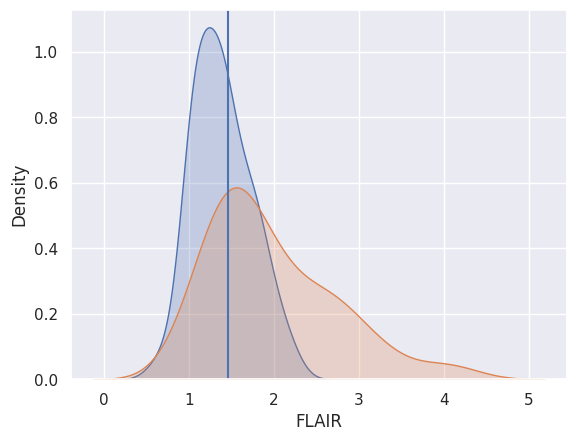

In [ ]:
sns.kdeplot(x0, shade = True, label = 'Gold Std = 0')
sns.kdeplot(x1, shade = True, label = 'Gold Std = 1')
plt.axvline(x=threshold)

plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(ytest, xtest)
roc_auc = auc(fpr, tpr)

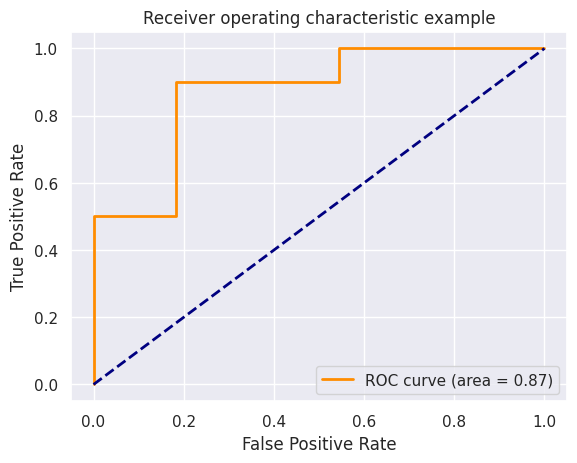

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Regression through the origin

let $Y_1, \ldots Y_n$ be a collection of variables we'd like to predict and $X_1, \ldots, X_n$ be predictors. Consider minimizing

$$
l = \sum_i ( Y_i - \beta X_i)^2 = || Y - \beta X||^2.
$$

Taking a derivative of $l$ with respect to $\beta$ yields

$$
l' = - \sum_i 2 (Y_i - \beta X_i) X_i.
$$

If we set this equal to zero and solve for beta we obtain the classic solution:

$$
\hat \beta = \frac{\sum_i Y_i X_i}{\sum_i X_i^2} = \frac{<Y, X>}{||X||^2}.
$$

Note further, if we take a second derivative we get

$$
l'' = \sum_i 2 x_i^2  
$$

which is strictly positive unless all of the $x_i$ are zero (a case of zero variation in the predictor where regresssion is uninteresting).

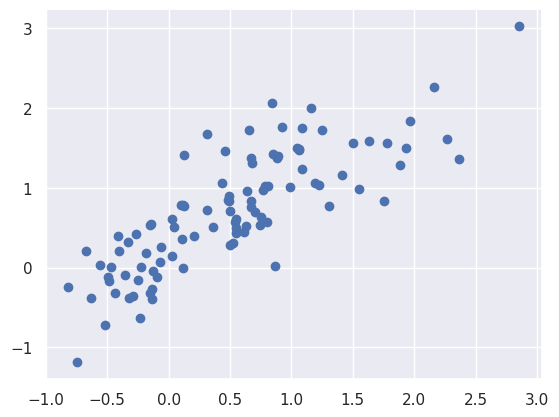

In [ ]:
# uses data from above
x = dat.T2
y = dat.PD
plt.plot(x, y, 'o')

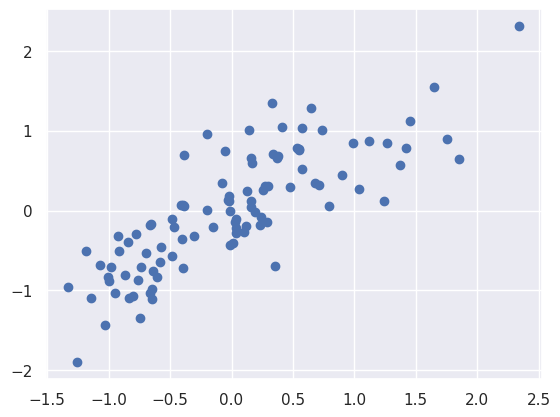

In [ ]:
#next the data is centered to make an origin based regression more reasonable
x = x - np.mean(x)
y = y - np.mean(y)
plt.plot(x, y, 'o')

In [ ]:
# finding the slope of the fit line
b = sum(y * x) / sum(x ** 2 )
b

0.7831514763655999

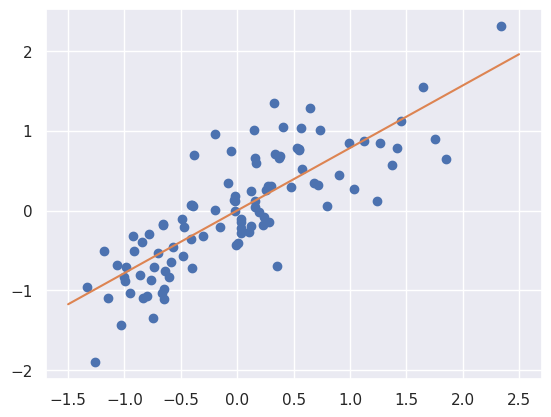

In [ ]:
plt.plot(x, y, 'o')
t = np.array([-1.5, 2.5])
plt.plot(t, t * b)

*the above plot shows the mean-centered fit for the data*

This made regression through the origin much, much easier!

##Lecture 9/13##
### Logistic Regression ###


Suppose now that we want to predict the gold standard from the FLAIR values. Fitting a line seems weird, since the outcome can only be 0 or 1. A line would allow for arbitrarily small or large predictions. Similiarly, forcing the prediction to be exactly 0 or 1 leads to difficult optimization problems. A clever solution is to instead model

$$
P(Y_i = 1 ~|~ X_i)
$$

where $Y_i$ is the gold standard value (0 or 1 for no lesion or lesion at that voxel, respectively) and $X_i$ is the FLAIR value for voxel $i$. This solves the problem somewhat nicely, but it still leaves some issues unresolved. For example, what does probability even mean in this context? And also probabilities are between 0 and 1, that's better than exactly 0 or 1, but still would create problems.  

As for getting the probabilities from $[0,1]$ to $(-\infty, \infty)$, we need a function, preferably a monotonic one. The generally agreed upon choice is the logit (natural log of the odds) function. The logit function of a probability is defined as

$$
\eta = \mathrm{logit}(p) = \log\{p / (1 - p)\}
$$

where $p$ is the probability and $O = p/(1-p)$ is called the **odds**. Note, you can go backwards from odds to probability with the function $p = O / (1 + O)$. Odds are exactly as used in gambling. If the odds of bet at 1 to 99, then you are saying the probability is $1 / (99 + 1) = 1\%$.   

You can go backwards from the logit function to the probability with the expit function. That is, if $\eta$ is defined as above, then

$$
p = \frac{e^{\eta}}{1 + e^\eta} = \frac{1}{1 + e^{-\eta}}.
$$

This is sometimes called the **expit** function or **sigmoid**.


We model the log of the odds as linear. This is called **logistic regression**.

$$
\eta = \mathrm{logit}\left\{ P(Y = 1 ~|~ X) \right\}
= \beta_0 + \beta_1 X.
$$

The nice part about this model is that $e^\beta_1$ has the nice interpretation of the odds ratio associated with a one unit change in $X$.  

**This is especially helpful with research logistical issues, like retrospective data. Trying to follow smokers for 50 years is hard, but finding patients with lung cancer who smoked and for how long is not. Logistic Regression and Odds allow for that.**  

This is great, but we still need a function of the probabilities to optimize. We'll use the **cross entropy**.  

**This uses the Maximum Likelihood Principle**  
Optimization can be used to minimize the cross entropy. For this example, Maximum Likelihood and Cross Entropy are the same thing with this model.  

$$
-\sum_{i=1}^n \left[Y_i \log\{P(Y_i = 1 ~|~ X_i)\} + (1 - Y_i) \log\{1 - P(Y_i = 1 ~|~ X_i)\}\right].
$$

This function has the interpretation of being the negative of the log of the probabilities assuming the $Y_i$ are independent. This model doesn't have to hold for the minimization to be useful.

Plugging our logit model in, the cross entropy now looks like

$$
-\sum_{i=1}^n \left[
  Y_i \eta_i + \log\left\{\frac{1}{1 + e^\eta_i} \right\} \right].
$$

This is the function that we minimize to perform logistic regression.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
## this sets some style parameters
sns.set()

## Read in the data and display a few rows
dat = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv")

In [2]:
## Plot the data
sns.scatterplot('FLAIR', 'GOLD_Lesions', data = dat)


TypeError: ignored

In [3]:
x = dat[['FLAIR']]
y = dat.GOLD_Lesions
trainFraction = .75

## Once again hold out some data
sample = np.random.uniform(size = 100) < trainFraction
xtrain = x[ sample]
ytrain = y[ sample]
xtest =  x[~sample]
ytest =  y[~sample]


In [4]:
lr = lm.LogisticRegression(fit_intercept=True, penalty='none')
fit = lr.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [5]:
beta0, beta1 = [fit.intercept_[0], fit.coef_[0][0]]
[beta0, beta1]

[-3.923752998811735, 2.3317345339091333]

In [7]:
n = 1000
xplot = np.linspace(-1, 5, n)
eta = beta0 + beta1 * xplot
p = 1 / (1 + np.exp(-eta))

sns.scatterplot('FLAIR', 'GOLD_Lesions', data = dat, hue = 'GOLD_Lesions')
sns.lineplot(xplot, p)

## Of course, scikit has a predict
## function so that you don't have to do this manually
yplot = fit.predict_proba(xplot.reshape((n, 1)))
#sns.lineplot(xplot, yplot[:, 1])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


TypeError: ignored